Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

Loading data from yahoo finance

In [4]:
# Define the ticker symbol for Bitcoin
ticker_symbol = 'BTC-USD'

# Fetch data from Yahoo Finance
btc_data = yf.download(ticker_symbol, start='2021-01-01', end='2024-05-25')

# Display the first few rows
print(btc_data.head())

# Save the data to a CSV file (optional)
btc_data.to_csv('bitcoin_data.csv')


[*********************100%%**********************]  1 of 1 completed

                    Open          High           Low         Close  \
Date                                                                 
2021-01-01  28994.009766  29600.626953  28803.585938  29374.152344   
2021-01-02  29376.455078  33155.117188  29091.181641  32127.267578   
2021-01-03  32129.408203  34608.558594  32052.316406  32782.023438   
2021-01-04  32810.949219  33440.218750  28722.755859  31971.914062   
2021-01-05  31977.041016  34437.589844  30221.187500  33992.429688   

               Adj Close       Volume  
Date                                   
2021-01-01  29374.152344  40730301359  
2021-01-02  32127.267578  67865420765  
2021-01-03  32782.023438  78665235202  
2021-01-04  31971.914062  81163475344  
2021-01-05  33992.429688  67547324782  


Plot of closing bitcoin price variation 2021 January to 2024 May

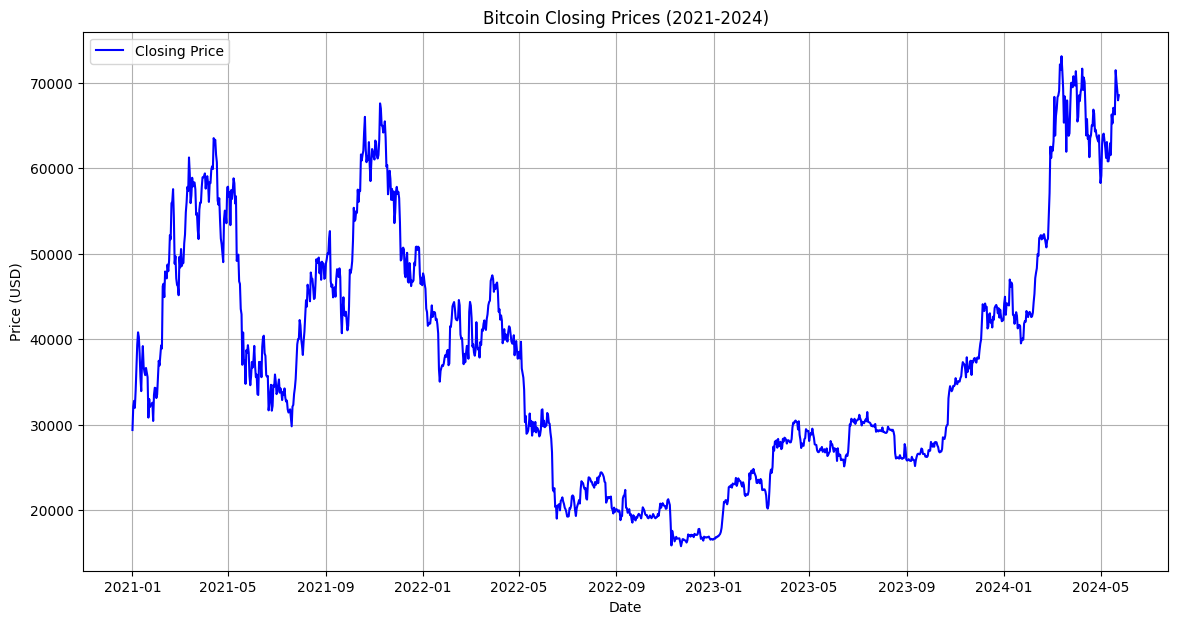

In [5]:
# Load the data
btc_data = pd.read_csv('bitcoin_data.csv', parse_dates=['Date'], index_col='Date')

# Plot the closing price of Bitcoin
plt.figure(figsize=(14, 7))
plt.plot(btc_data.index, btc_data['Close'], label='Closing Price', color='blue')

# Adding titles and labels
plt.title('Bitcoin Closing Prices (2021-2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


Amount of data consideration

In [6]:
len(btc_data)

1240

Split data into Training data and Testing data

In [7]:
to_row = int(len(btc_data)*0.8)
training_data = list(btc_data[0:to_row] ['Close'])
testing_data = list(btc_data[to_row:] ['Close'])

Plot of Training data and Testing data

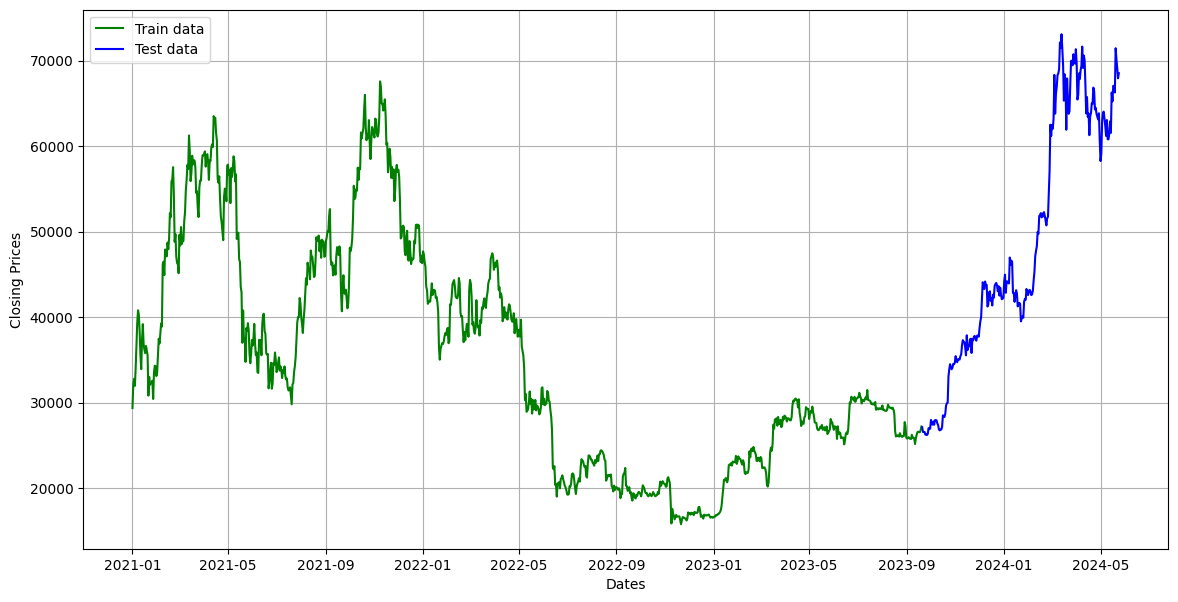

In [8]:
plt.figure(figsize=(14,7))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(btc_data[0:to_row]['Close'], 'green', label='Train data')
plt.plot(btc_data[to_row:] ['Close'], 'blue', label='Test data')
plt.legend()

ARIMA model design

In [9]:
model_predictions = []
n_test_obser = len(testing_data)

In [10]:
for i in range(n_test_obser):
    model = ARIMA(training_data, order=(4, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]  # Directly get the forecasted value
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

In [11]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1239
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -10708.026
Date:                Mon, 27 May 2024   AIC                          21426.052
Time:                        19:22:38   BIC                          21451.658
Sample:                             0   HQIC                         21435.682
                               - 1239                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0357      0.017     -2.068      0.039      -0.070      -0.002
ar.L2          0.0152      0.023      0.663      0.508      -0.030       0.060
ar.L3          0.0229      0.024      0.969      0.3

Plot of actual price and predicted price

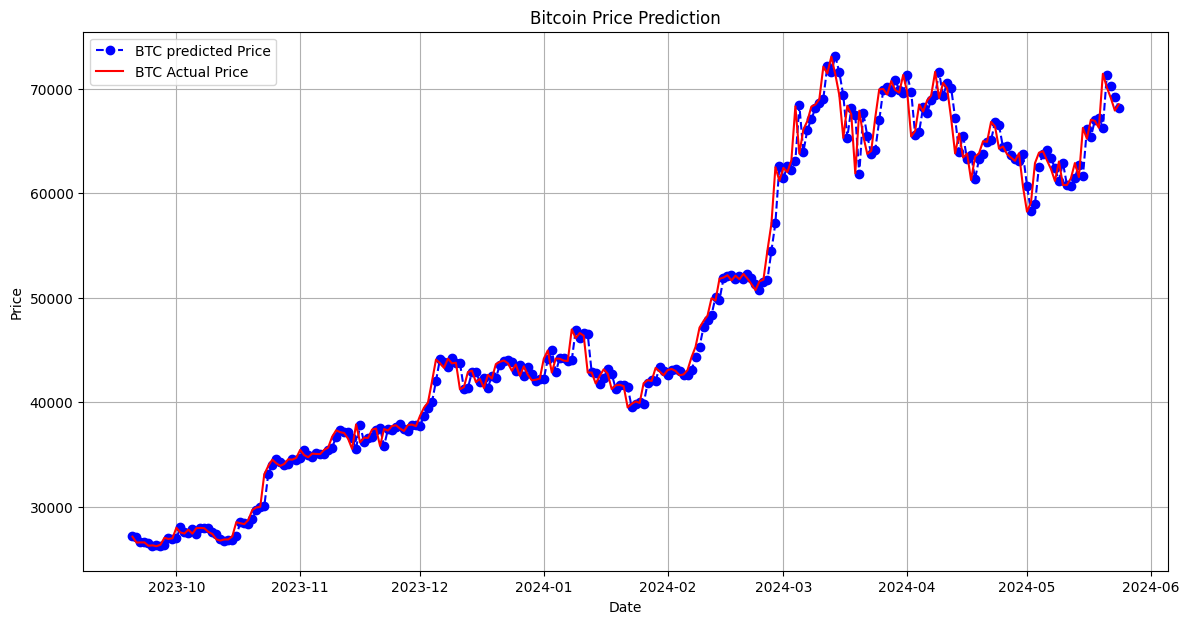

In [12]:
plt.figure(figsize=(14,7))
plt.grid(True)

date_range = btc_data[to_row:].index

plt.plot(date_range, model_predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'BTC predicted Price')
plt.plot(date_range, testing_data, color = 'red', label = 'BTC Actual Price')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Predicting tomorrow bitcoin price

In [13]:
# Train the ARIMA model with all available data
model = ARIMA(btc_data['Close'], order=(4, 1, 0))
model_fit = model.fit()

# Forecast the next day's price
forecast = model_fit.forecast(steps=1)
predicted_price = forecast[0]

print("Predicted Bitcoin price for tomorrow:", predicted_price)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Predicted Bitcoin price for tomorrow: 68399.52053899899


Model Evaluation

 Calculate Mean Absolute Percentage Error (MAPE)

In [103]:
mape = np.mean(np.abs(np.array(model_predictions) - np.array(testing_data)) / np.abs(testing_data))
print('MAPE: ' + str(mape))  # Mean Absolute Percentage Error

# Interpretation: Around 1.9% MAPE (Mean Absolute Percentage Error) implies the model is about 96.2% accurate in predicting the test set observations.

MAPE: 0.019477246482607197


Calculating R-squared

In [108]:
from sklearn.metrics import r2_score

# Calculate R-squared value
r2 = r2_score(testing_data, model_predictions)
print('R-squared: ' + str(r2))


R-squared: 0.9886920392399661


Calculating MAE value

In [106]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(testing_data, model_predictions)
print('MAE: ' + str(mae))


MAE: 1015.2579190533166


Calculating MSE value

In [107]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(testing_data, model_predictions)
print('Test Loss (MSE): ' + str(mse))


Test Loss (MSE): 2329893.186351752
